# Enter State Farm

In [1]:
from fastai.conv_learner import *

In [2]:
%matplotlib inline
# from __future__ import print_function, division
path = "data/state/"
path = "data/state/sample/"
# import utils; reload(utils)
# from utils import *
from IPython.display import FileLink

In [3]:
bs=64
sz=224

## Setup batches

In [6]:
PATH = Path('data/state')

In [12]:
arch=vgg16 # With BatchNorm
data = ImageClassifierData.from_paths(path, bs=bs, tfms=tfms_from_model(arch, sz, max_zoom=0.1))
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 16/16 [00:06<00:00,  2.30it/s]


In [13]:
learn.crit = F.nll_loss
learn.metrics = [accuracy]

In [14]:
learn.lr_find()

epoch      trn_loss   val_loss   accuracy                
    0      4.250473   209.11381  0.137     



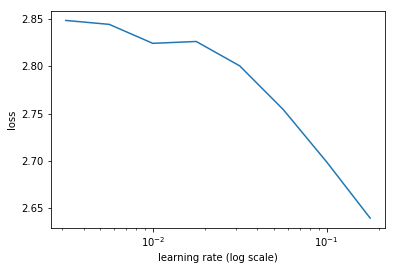

In [15]:
learn.sched.plot()

## Re-run sample experiments on full dataset

We should find that everything that worked on the sample (see statefarm-sample.ipynb), works on the full dataset too. Only better! Because now we have more data. So let's see how they go - the models in this section are exact copies of the sample notebook models.

### Single conv layer

In [19]:
def conv1(batches):
    model = Sequential([
            BatchNormalization(axis=1, input_shape=(3,224,224)),
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Flatten(),
            Dense(200, activation='relu'),
            BatchNormalization(),
            Dense(10, activation='softmax')
        ])

    model.compile(Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data=val_batches, 
                     nb_val_samples=val_batches.nb_sample)
    model.optimizer.lr = 0.001
    model.fit_generator(batches, batches.nb_sample, nb_epoch=4, validation_data=val_batches, 
                     nb_val_samples=val_batches.nb_sample)
    return model

In [20]:
model = conv1(batches)

Epoch 1/2
18946/18946 [==============================] - 114s - loss: 0.2273 - acc: 0.9405 - val_loss: 2.4946 - val_acc: 0.2826
Epoch 2/2
18946/18946 [==============================] - 114s - loss: 0.0120 - acc: 0.9990 - val_loss: 1.5872 - val_acc: 0.5253
Epoch 1/4
18946/18946 [==============================] - 114s - loss: 0.0093 - acc: 0.9992 - val_loss: 1.4836 - val_acc: 0.5825
Epoch 2/4
18946/18946 [==============================] - 114s - loss: 0.0032 - acc: 1.0000 - val_loss: 1.3142 - val_acc: 0.6162
Epoch 3/4
18946/18946 [==============================] - 114s - loss: 0.0035 - acc: 0.9996 - val_loss: 1.5061 - val_acc: 0.5771
Epoch 4/4
18946/18946 [==============================] - 114s - loss: 0.0036 - acc: 0.9997 - val_loss: 1.4528 - val_acc: 0.5808


Interestingly, with no regularization or augmentation we're getting some reasonable results from our simple convolutional model. So with augmentation, we hopefully will see some very good results.

### Data augmentation

In [6]:
gen_t = image.ImageDataGenerator(rotation_range=15, height_shift_range=0.05, 
                shear_range=0.1, channel_shift_range=20, width_shift_range=0.1)
batches = get_batches(path+'train', gen_t, batch_size=batch_size)

Found 18946 images belonging to 10 classes.


In [22]:
model = conv1(batches)

Epoch 1/2
18946/18946 [==============================] - 114s - loss: 1.2804 - acc: 0.5891 - val_loss: 2.0614 - val_acc: 0.3407
Epoch 2/2
18946/18946 [==============================] - 114s - loss: 0.6716 - acc: 0.7916 - val_loss: 1.3377 - val_acc: 0.6208
Epoch 1/4
18946/18946 [==============================] - 115s - loss: 0.4787 - acc: 0.8594 - val_loss: 1.2230 - val_acc: 0.6228
Epoch 2/4
18946/18946 [==============================] - 114s - loss: 0.3724 - acc: 0.8931 - val_loss: 1.3030 - val_acc: 0.6282
Epoch 3/4
18946/18946 [==============================] - 114s - loss: 0.3086 - acc: 0.9162 - val_loss: 1.1986 - val_acc: 0.7119
Epoch 4/4
18946/18946 [==============================] - 114s - loss: 0.2612 - acc: 0.9283 - val_loss: 1.4794 - val_acc: 0.5799


In [23]:
model.optimizer.lr = 0.0001
model.fit_generator(batches, batches.nb_sample, nb_epoch=15, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/15
18946/18946 [==============================] - 114s - loss: 0.2391 - acc: 0.9361 - val_loss: 1.2511 - val_acc: 0.6886
Epoch 2/15
18946/18946 [==============================] - 114s - loss: 0.2075 - acc: 0.9430 - val_loss: 1.1327 - val_acc: 0.7294
Epoch 3/15
18946/18946 [==============================] - 114s - loss: 0.1800 - acc: 0.9529 - val_loss: 1.1099 - val_acc: 0.7294
Epoch 4/15
18946/18946 [==============================] - 114s - loss: 0.1675 - acc: 0.9557 - val_loss: 1.0660 - val_acc: 0.7363
Epoch 5/15
18946/18946 [==============================] - 114s - loss: 0.1432 - acc: 0.9625 - val_loss: 1.1585 - val_acc: 0.7073
Epoch 6/15
18946/18946 [==============================] - 114s - loss: 0.1358 - acc: 0.9627 - val_loss: 1.1389 - val_acc: 0.6947
Epoch 7/15
18946/18946 [==============================] - 114s - loss: 0.1283 - acc: 0.9665 - val_loss: 1.1329 - val_acc: 0.7369
Epoch 8/15
18946/18946 [==============================] - 114s - loss: 0.1180 - acc: 0.9686 - val

I'm shocked by *how* good these results are! We're regularly seeing 75-80% accuracy on the validation set, which puts us into the top third or better of the competition. With such a simple model and no dropout or semi-supervised learning, this really speaks to the power of this approach to data augmentation.

### Four conv/pooling pairs + dropout

Unfortunately, the results are still very unstable - the validation accuracy jumps from epoch to epoch. Perhaps a deeper model with some dropout would help.

In [20]:
gen_t = image.ImageDataGenerator(rotation_range=15, height_shift_range=0.05, 
                shear_range=0.1, channel_shift_range=20, width_shift_range=0.1)
batches = get_batches(path+'train', gen_t, batch_size=batch_size)

Found 18946 images belonging to 10 classes.


In [21]:
model = Sequential([
        BatchNormalization(axis=1, input_shape=(3,224,224)),
        Convolution2D(32,3,3, activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(64,3,3, activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(128,3,3, activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Flatten(),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

In [22]:
model.compile(Adam(lr=10e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/2
18946/18946 [==============================] - 159s - loss: 2.6578 - acc: 0.2492 - val_loss: 1.8681 - val_acc: 0.3844
Epoch 2/2
18946/18946 [==============================] - 158s - loss: 1.8098 - acc: 0.4334 - val_loss: 1.3152 - val_acc: 0.5670


In [24]:
model.optimizer.lr=0.001

In [25]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=10, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/10
18946/18946 [==============================] - 159s - loss: 1.4232 - acc: 0.5405 - val_loss: 1.0877 - val_acc: 0.6452
Epoch 2/10
18946/18946 [==============================] - 159s - loss: 1.1155 - acc: 0.6346 - val_loss: 1.2730 - val_acc: 0.6878
Epoch 3/10
18946/18946 [==============================] - 159s - loss: 0.9043 - acc: 0.7025 - val_loss: 1.1393 - val_acc: 0.6354
Epoch 4/10
18946/18946 [==============================] - 159s - loss: 0.7444 - acc: 0.7529 - val_loss: 1.1037 - val_acc: 0.7087
Epoch 5/10
18946/18946 [==============================] - 159s - loss: 0.6299 - acc: 0.7955 - val_loss: 0.9123 - val_acc: 0.7455
Epoch 6/10
18946/18946 [==============================] - 159s - loss: 0.5220 - acc: 0.8275 - val_loss: 1.0418 - val_acc: 0.7484
Epoch 7/10
18946/18946 [==============================] - 159s - loss: 0.4686 - acc: 0.8495 - val_loss: 1.2907 - val_acc: 0.6599
Epoch 8/10
18946/18946 [==============================] - 159s - loss: 0.4190 - acc: 0.8653 - val

In [26]:
model.optimizer.lr=0.00001

In [27]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=10, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/10
18946/18946 [==============================] - 159s - loss: 0.3183 - acc: 0.8976 - val_loss: 1.0359 - val_acc: 0.7688
Epoch 2/10
18946/18946 [==============================] - 158s - loss: 0.2788 - acc: 0.9109 - val_loss: 1.5806 - val_acc: 0.6705
Epoch 3/10
18946/18946 [==============================] - 158s - loss: 0.2810 - acc: 0.9124 - val_loss: 0.9836 - val_acc: 0.7887
Epoch 4/10
18946/18946 [==============================] - 158s - loss: 0.2403 - acc: 0.9244 - val_loss: 1.1832 - val_acc: 0.7493
Epoch 5/10
18946/18946 [==============================] - 159s - loss: 0.2195 - acc: 0.9303 - val_loss: 1.1524 - val_acc: 0.7510
Epoch 6/10
18946/18946 [==============================] - 159s - loss: 0.2085 - acc: 0.9359 - val_loss: 1.2245 - val_acc: 0.7415
Epoch 7/10
18946/18946 [==============================] - 158s - loss: 0.1961 - acc: 0.9399 - val_loss: 1.1232 - val_acc: 0.7654
Epoch 8/10
18946/18946 [==============================] - 158s - loss: 0.1851 - acc: 0.9416 - val

This is looking quite a bit better - the accuracy is similar, but the stability is higher. There's still some way to go however...

### Imagenet conv features

Since we have so little data, and it is similar to imagenet images (full color photos), using pre-trained VGG weights is likely to be helpful - in fact it seems likely that we won't need to fine-tune the convolutional layer weights much, if at all. So we can pre-compute the output of the last convolutional layer, as we did in lesson 3 when we experimented with dropout. (However this means that we can't use full data augmentation, since we can't pre-compute something that changes every image.)

In [14]:
vgg = Vgg16()
model=vgg.model
last_conv_idx = [i for i,l in enumerate(model.layers) if type(l) is Convolution2D][-1]
conv_layers = model.layers[:last_conv_idx+1]

In [15]:
conv_model = Sequential(conv_layers)

In [ ]:
# batches shuffle must be set to False when pre-computing features
batches = get_batches(path+'train', batch_size=batch_size, shuffle=False)

In [16]:
(val_classes, trn_classes, val_labels, trn_labels, 
    val_filenames, filenames, test_filenames) = get_classes(path)

Found 18946 images belonging to 10 classes.
Found 3478 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [ ]:
conv_feat = conv_model.predict_generator(batches, batches.nb_sample)
conv_val_feat = conv_model.predict_generator(val_batches, val_batches.nb_sample)
conv_test_feat = conv_model.predict_generator(test_batches, test_batches.nb_sample)

In [ ]:
save_array(path+'results/conv_val_feat.dat', conv_val_feat)
save_array(path+'results/conv_test_feat.dat', conv_test_feat)
save_array(path+'results/conv_feat.dat', conv_feat)

In [10]:
conv_feat = load_array(path+'results/conv_feat.dat')
conv_val_feat = load_array(path+'results/conv_val_feat.dat')
conv_val_feat.shape

(3478, 512, 14, 14)

### Batchnorm dense layers on pretrained conv layers

Since we've pre-computed the output of the last convolutional layer, we need to create a network that takes that as input, and predicts our 10 classes. Let's try using a simplified version of VGG's dense layers.

In [71]:
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dropout(p/2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(10, activation='softmax')
        ]

In [72]:
p=0.8

In [73]:
bn_model = Sequential(get_bn_layers(p))
bn_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, nb_epoch=1, 
             validation_data=(conv_val_feat, val_labels))

Train on 18946 samples, validate on 3478 samples
Epoch 1/1
18946/18946 [==============================] - 3s - loss: 1.5894 - acc: 0.5625 - val_loss: 0.7031 - val_acc: 0.7522


In [75]:
bn_model.optimizer.lr=0.01

In [76]:
bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, nb_epoch=2, 
             validation_data=(conv_val_feat, val_labels))

Train on 18946 samples, validate on 3478 samples
Epoch 1/2
18946/18946 [==============================] - 3s - loss: 0.2870 - acc: 0.9109 - val_loss: 0.7728 - val_acc: 0.7683
Epoch 2/2
18946/18946 [==============================] - 3s - loss: 0.1422 - acc: 0.9594 - val_loss: 0.7576 - val_acc: 0.7936


In [77]:
bn_model.save_weights(path+'models/conv8.h5')

Looking good! Let's try pre-computing 5 epochs worth of augmented data, so we can experiment with combining dropout and augmentation on the pre-trained model.

### Pre-computed data augmentation + dropout

We'll use our usual data augmentation parameters:

In [107]:
gen_t = image.ImageDataGenerator(rotation_range=15, height_shift_range=0.05, 
                shear_range=0.1, channel_shift_range=20, width_shift_range=0.1)
da_batches = get_batches(path+'train', gen_t, batch_size=batch_size, shuffle=False)

Found 18946 images belonging to 10 classes.


We use those to create a dataset of convolutional features 5x bigger than the training set.

In [108]:
da_conv_feat = conv_model.predict_generator(da_batches, da_batches.nb_sample*5)

In [109]:
save_array(path+'results/da_conv_feat2.dat', da_conv_feat)

In [78]:
da_conv_feat = load_array(path+'results/da_conv_feat2.dat')

Let's include the real training data as well in its non-augmented form.

In [131]:
da_conv_feat = np.concatenate([da_conv_feat, conv_feat])

Since we've now got a dataset 6x bigger than before, we'll need to copy our labels 6 times too.

In [132]:
da_trn_labels = np.concatenate([trn_labels]*6)

Based on some experiments the previous model works well, with bigger dense layers.

In [210]:
def get_bn_da_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dropout(p),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(10, activation='softmax')
        ]

In [216]:
p=0.8

In [240]:
bn_model = Sequential(get_bn_da_layers(p))
bn_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Now we can train the model as usual, with pre-computed augmented data.

In [241]:
bn_model.fit(da_conv_feat, da_trn_labels, batch_size=batch_size, nb_epoch=1, 
             validation_data=(conv_val_feat, val_labels))

Train on 113676 samples, validate on 3478 samples
Epoch 1/1
113676/113676 [==============================] - 16s - loss: 1.5848 - acc: 0.5068 - val_loss: 0.6340 - val_acc: 0.8131


In [242]:
bn_model.optimizer.lr=0.01

In [243]:
bn_model.fit(da_conv_feat, da_trn_labels, batch_size=batch_size, nb_epoch=4, 
             validation_data=(conv_val_feat, val_labels))

Train on 113676 samples, validate on 3478 samples
Epoch 1/4
113676/113676 [==============================] - 16s - loss: 0.6652 - acc: 0.7785 - val_loss: 0.6343 - val_acc: 0.8082
Epoch 2/4
113676/113676 [==============================] - 16s - loss: 0.5247 - acc: 0.8318 - val_loss: 0.6951 - val_acc: 0.8085
Epoch 3/4
113676/113676 [==============================] - 16s - loss: 0.4553 - acc: 0.8544 - val_loss: 0.6067 - val_acc: 0.8189
Epoch 4/4
113676/113676 [==============================] - 16s - loss: 0.4127 - acc: 0.8686 - val_loss: 0.7701 - val_acc: 0.7915


In [244]:
bn_model.optimizer.lr=0.0001

In [245]:
bn_model.fit(da_conv_feat, da_trn_labels, batch_size=batch_size, nb_epoch=4, 
             validation_data=(conv_val_feat, val_labels))

Train on 113676 samples, validate on 3478 samples
Epoch 1/4
113676/113676 [==============================] - 16s - loss: 0.3837 - acc: 0.8775 - val_loss: 0.6904 - val_acc: 0.8197
Epoch 2/4
113676/113676 [==============================] - 16s - loss: 0.3576 - acc: 0.8872 - val_loss: 0.6593 - val_acc: 0.8209
Epoch 3/4
113676/113676 [==============================] - 16s - loss: 0.3384 - acc: 0.8939 - val_loss: 0.7057 - val_acc: 0.8085
Epoch 4/4
113676/113676 [==============================] - 16s - loss: 0.3254 - acc: 0.8977 - val_loss: 0.6867 - val_acc: 0.8128


Looks good - let's save those weights.

In [246]:
bn_model.save_weights(path+'models/da_conv8_1.h5')

### Pseudo labeling

We're going to try using a combination of [pseudo labeling](http://deeplearning.net/wp-content/uploads/2013/03/pseudo_label_final.pdf) and [knowledge distillation](https://arxiv.org/abs/1503.02531) to allow us to use unlabeled data (i.e. do semi-supervised learning). For our initial experiment we'll use the validation set as the unlabeled data, so that we can see that it is working without using the test set. At a later date we'll try using the test set.

To do this, we simply calculate the predictions of our model...

In [247]:
val_pseudo = bn_model.predict(conv_val_feat, batch_size=batch_size)

...concatenate them with our training labels...

In [255]:
comb_pseudo = np.concatenate([da_trn_labels, val_pseudo])

In [256]:
comb_feat = np.concatenate([da_conv_feat, conv_val_feat])

...and fine-tune our model using that data.

In [257]:
bn_model.load_weights(path+'models/da_conv8_1.h5')

In [258]:
bn_model.fit(comb_feat, comb_pseudo, batch_size=batch_size, nb_epoch=1, 
             validation_data=(conv_val_feat, val_labels))

Train on 117154 samples, validate on 3478 samples
Epoch 1/1
117154/117154 [==============================] - 17s - loss: 0.3412 - acc: 0.8948 - val_loss: 0.7653 - val_acc: 0.8191


In [259]:
bn_model.fit(comb_feat, comb_pseudo, batch_size=batch_size, nb_epoch=4, 
             validation_data=(conv_val_feat, val_labels))

Train on 117154 samples, validate on 3478 samples
Epoch 1/4
117154/117154 [==============================] - 17s - loss: 0.3237 - acc: 0.9008 - val_loss: 0.7536 - val_acc: 0.8229
Epoch 2/4
117154/117154 [==============================] - 17s - loss: 0.3076 - acc: 0.9050 - val_loss: 0.7572 - val_acc: 0.8235
Epoch 3/4
117154/117154 [==============================] - 17s - loss: 0.2984 - acc: 0.9085 - val_loss: 0.7852 - val_acc: 0.8269
Epoch 4/4
117154/117154 [==============================] - 17s - loss: 0.2902 - acc: 0.9117 - val_loss: 0.7630 - val_acc: 0.8263


In [260]:
bn_model.optimizer.lr=0.00001

In [261]:
bn_model.fit(comb_feat, comb_pseudo, batch_size=batch_size, nb_epoch=4, 
             validation_data=(conv_val_feat, val_labels))

Train on 117154 samples, validate on 3478 samples
Epoch 1/4
117154/117154 [==============================] - 17s - loss: 0.2837 - acc: 0.9134 - val_loss: 0.7901 - val_acc: 0.8200
Epoch 2/4
117154/117154 [==============================] - 17s - loss: 0.2760 - acc: 0.9155 - val_loss: 0.7648 - val_acc: 0.8275
Epoch 3/4
117154/117154 [==============================] - 17s - loss: 0.2723 - acc: 0.9183 - val_loss: 0.7382 - val_acc: 0.8358
Epoch 4/4
117154/117154 [==============================] - 17s - loss: 0.2657 - acc: 0.9191 - val_loss: 0.7227 - val_acc: 0.8329


That's a distinct improvement - even although the validation set isn't very big. This looks encouraging for when we try this on the test set.

In [262]:
bn_model.save_weights(path+'models/bn-ps8.h5')

### Submit

We'll find a good clipping amount using the validation set, prior to submitting.

In [271]:
def do_clip(arr, mx): return np.clip(arr, (1-mx)/9, mx)

In [282]:
keras.metrics.categorical_crossentropy(val_labels, do_clip(val_preds, 0.93)).eval()

array(0.6726388006592667)

In [283]:
conv_test_feat = load_array(path+'results/conv_test_feat.dat')

In [284]:
preds = bn_model.predict(conv_test_feat, batch_size=batch_size*2)

In [285]:
subm = do_clip(preds,0.93)

In [305]:
subm_name = path+'results/subm.gz'

In [296]:
classes = sorted(batches.class_indices, key=batches.class_indices.get)

In [301]:
submission = pd.DataFrame(subm, columns=classes)
submission.insert(0, 'img', [a[4:] for a in test_filenames])
submission.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_68347.jpg,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.093739,0.815874,0.079049,0.007778
1,img_55725.jpg,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.930000,0.007778
2,img_92799.jpg,0.007778,0.930000,0.017918,0.007778,0.007778,0.007778,0.009022,0.007778,0.007778,0.007778
3,img_72170.jpg,0.007778,0.007778,0.363869,0.007778,0.007778,0.007778,0.200521,0.007778,0.425176,0.007778
4,img_59154.jpg,0.695756,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.047384,0.249183


In [307]:
submission.to_csv(subm_name, index=False, compression='gzip')

In [308]:
FileLink(subm_name)

/data/jhoward/fast-image/nbs/data/state/results/subm.gz

This gets 0.534 on the leaderboard.

## The "things that didn't really work" section

You can safely ignore everything from here on, because they didn't really help.

### Finetune some conv layers too

In [28]:
for l in get_bn_layers(p): conv_model.add(l)

In [29]:
for l1,l2 in zip(bn_model.layers, conv_model.layers[last_conv_idx+1:]):
    l2.set_weights(l1.get_weights())

In [30]:
for l in conv_model.layers: l.trainable =False

In [31]:
for l in conv_model.layers[last_conv_idx+1:]: l.trainable =True

In [36]:
comb = np.concatenate([trn, val])

In [37]:
gen_t = image.ImageDataGenerator(rotation_range=8, height_shift_range=0.04, 
                shear_range=0.03, channel_shift_range=10, width_shift_range=0.08)

In [38]:
batches = gen_t.flow(comb, comb_pseudo, batch_size=batch_size)

Exception: X (images tensor) and y (labels) should have the same length. Found: X.shape = (22424, 3, 224, 224), y.shape = (98208, 10)

In [176]:
val_batches = get_batches(path+'valid', batch_size=batch_size*2, shuffle=False)

Found 3478 images belonging to 10 classes.


In [177]:
conv_model.compile(Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [178]:
conv_model.fit_generator(batches, batches.N, nb_epoch=1, validation_data=val_batches, 
                 nb_val_samples=val_batches.N)

Epoch 1/1
22400/22424 [============================>.] - ETA: 0s - loss: 0.4348 - acc: 0.9200

MemoryError: Error allocating 1644167168 bytes of device memory (CNMEM_STATUS_OUT_OF_MEMORY).
Apply node that caused the error: GpuAllocEmpty(Shape_i{0}.0, Shape_i{0}.0, Elemwise{Composite{(((i0 - i1) // i2) + i2)}}[(0, 1)].0, Elemwise{Composite{(((i0 - i1) // i2) + i2)}}[(0, 1)].0)
Toposort index: 157
Inputs types: [TensorType(int64, scalar), TensorType(int64, scalar), TensorType(int64, scalar), TensorType(int64, scalar)]
Inputs shapes: [(), (), (), ()]
Inputs strides: [(), (), (), ()]
Inputs values: [array(128), array(64), array(224), array(224)]
Outputs clients: [[GpuDnnConv{algo='small', inplace=True}(GpuContiguous.0, GpuContiguous.0, GpuAllocEmpty.0, GpuDnnConvDesc{border_mode='valid', subsample=(1, 1), conv_mode='conv', precision='float32'}.0, Constant{1.0}, Constant{0.0})]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [ ]:
conv_model.optimizer.lr = 0.0001

In [ ]:
conv_model.fit_generator(batches, batches.N, nb_epoch=3, validation_data=val_batches, 
                 nb_val_samples=val_batches.N)

In [ ]:
for l in conv_model.layers[16:]: l.trainable =True

In [ ]:
conv_model.optimizer.lr = 0.00001

In [ ]:
conv_model.fit_generator(batches, batches.N, nb_epoch=8, validation_data=val_batches, 
                 nb_val_samples=val_batches.N)

In [ ]:
conv_model.save_weights(path+'models/conv8_ps.h5')

In [77]:
conv_model.load_weights(path+'models/conv8_da.h5')

In [135]:
val_pseudo = conv_model.predict(val, batch_size=batch_size*2)

In [159]:
save_array(path+'models/pseudo8_da.dat', val_pseudo)

### Ensembling

In [14]:
drivers_ds = pd.read_csv(path+'driver_imgs_list.csv')
drivers_ds.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [15]:
img2driver = drivers_ds.set_index('img')['subject'].to_dict()

In [16]:
driver2imgs = {k: g["img"].tolist() 
               for k,g in drivers_ds[['subject', 'img']].groupby("subject")}

In [56]:
def get_idx(driver_list):
    return [i for i,f in enumerate(filenames) if img2driver[f[3:]] in driver_list]

In [17]:
drivers = driver2imgs.keys()

In [94]:
rnd_drivers = np.random.permutation(drivers)

In [95]:
ds1 = rnd_drivers[:len(rnd_drivers)//2]
ds2 = rnd_drivers[len(rnd_drivers)//2:]

In [68]:
models=[fit_conv([d]) for d in drivers]
models=[m for m in models if m is not None]

In [77]:
all_preds = np.stack([m.predict(conv_test_feat, batch_size=128) for m in models])
avg_preds = all_preds.mean(axis=0)
avg_preds = avg_preds/np.expand_dims(avg_preds.sum(axis=1), 1)

In [102]:
keras.metrics.categorical_crossentropy(val_labels, np.clip(avg_val_preds,0.01,0.99)).eval()

array(0.9753041572894531)

In [103]:
keras.metrics.categorical_accuracy(val_labels, np.clip(avg_val_preds,0.01,0.99)).eval()

array(0.6949396133422852, dtype=float32)